In [1]:
from utils import *
check_tensorflow_gpu()
K.clear_session()

proxy = SpatiotemporalCO2()

proxy.num_epochs = 100
proxy.batch_size = 15
proxy.verbose    = 1
proxy.l2_alpha   = 0.9

Checking Tensorflow Version:
Tensorflow built with CUDA? True
Tensorflow version: 2.10.0
# GPU available: 1
CUDA: 64_112 | cuDNN: 64_8
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
proxy.load_data()
proxy.process_data(subsample=300)

X: (1000, 64, 64, 4) | y: (1000, 60, 64, 64, 2)
normalized - X: (1000, 64, 64, 4) | y: (1000, 60, 64, 64, 2)
Train - X: (225, 64, 64, 4) | y: (225, 60, 64, 64, 2)
Test  - X: (75, 64, 64, 4) | y: (75, 60, 64, 64, 2)


# Parameters: 486,038
Epoch 1/100
12/12 [==============================] - 25s 1s/step - loss: 0.7337 - mse: 0.2042 - val_loss: 0.6689 - val_mse: 0.0395
Epoch 2/100
12/12 [==============================] - 13s 1s/step - loss: 0.6740 - mse: 0.0514 - val_loss: 0.6476 - val_mse: 0.0425
Epoch 3/100
12/12 [==============================] - 13s 1s/step - loss: 0.6646 - mse: 0.0413 - val_loss: 0.6036 - val_mse: 0.0273
Epoch 4/100
12/12 [==============================] - 13s 1s/step - loss: 0.6564 - mse: 0.0361 - val_loss: 0.6190 - val_mse: 0.0239
Epoch 5/100
12/12 [==============================] - 13s 1s/step - loss: 0.6583 - mse: 0.0452 - val_loss: 0.6845 - val_mse: 0.0564
Epoch 6/100
12/12 [==============================] - 12s 1s/step - loss: 0.6650 - mse: 0.0402 - val_loss: 0.5772 - val_mse: 0.0270
Epoch 7/100
12/12 [==============================] - 13s 1s/step - loss: 0.6596 - mse: 0.0420 - val_loss: 0.6756 - val_mse: 0.0457
Epoch 8/100
12/12 [==============================] - 13s 1s/s

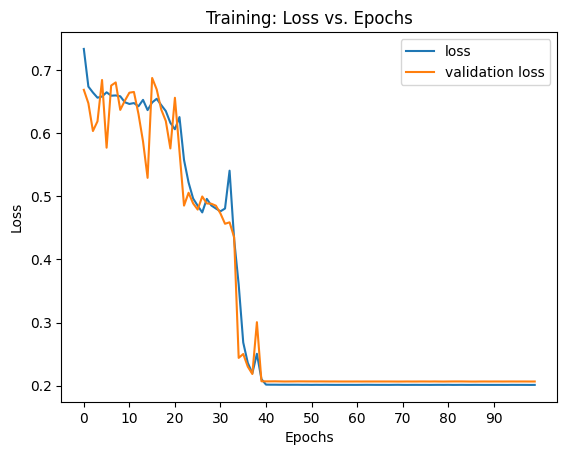

In [3]:
model0 = proxy.make_model()

model, fit = proxy.train(model0)

In [5]:
y_train_pred = model.predict(proxy.X_train)
y_test_pred  = model.predict(proxy.X_test)
print('Train pred: {} | Test pred: {}'.format(y_train_pred.shape, y_test_pred.shape))

3/3 [==============================] - 1s 475ms/step
Train pred: (225, 60, 64, 64, 2) | Test pred: (75, 60, 64, 64, 2)


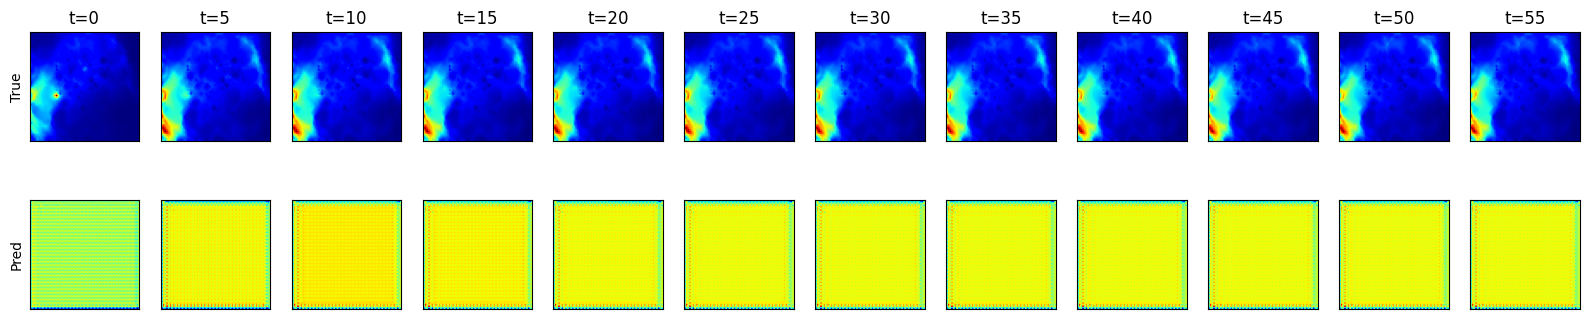

In [10]:
k = 100

fig, axs = plt.subplots(2, 12, figsize=(20,4))
for j in range(12):
    axs[0,j].imshow(proxy.y_train[k,j*5,:,:,0], 'jet')
    axs[1,j].imshow(y_train_pred[k,j*5,:,:,0], 'jet')
    axs[0,j].set(title='t={}'.format(j*5))
    for i in range(2):
        axs[i,j].set(xticks=[], yticks=[])
axs[0,0].set(ylabel='True'); axs[1,0].set(ylabel='Pred')
plt.show()

***
# END